# 지도 학습

In [1]:
from preamble import *

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 과대적합에 취약

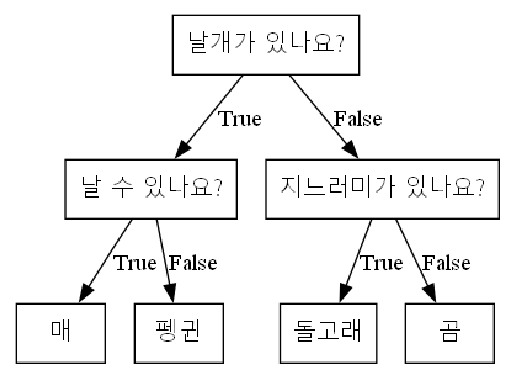

In [2]:
# 결정트리 예제
mglearn.plots.plot_animal_tree()

### 일반적인 결정트리 학습

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["악성","양성"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

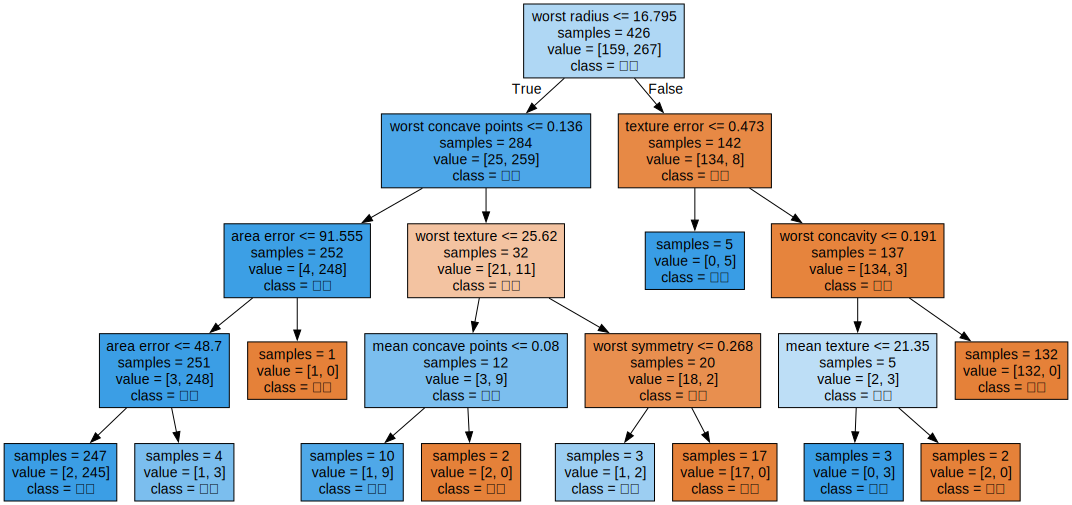

In [5]:
import graphviz
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 특성 중요도

In [6]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)

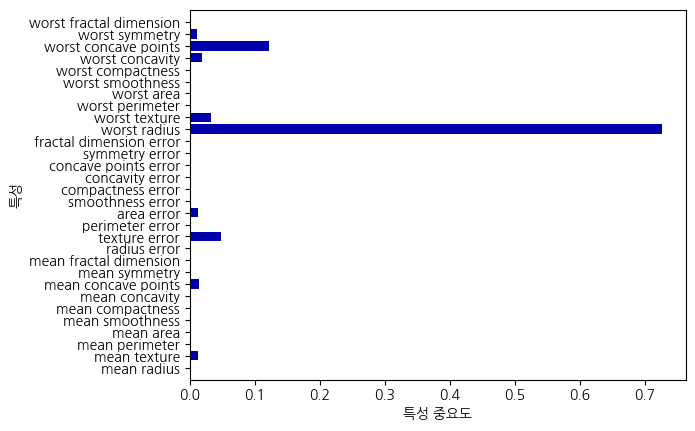

In [7]:
plot_feat_importances(tree)

In [8]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train), rfc.score(X_test, y_test))

1.0 0.958041958041958


In [10]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
for tree in rfc.estimators_:
    export_tree = export_graphviz(tree,
                                  out_file=None,
                                  feature_names=cancer.feature_names, 
                                  special_characters=True,
                                  rotate=True,
                                  precision=1,
                                  filled=True)    
    # display(graphviz.Source(export_tree))


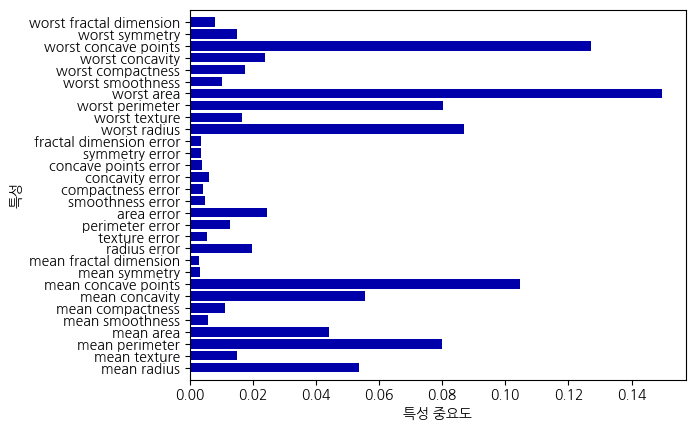

In [11]:
plot_feat_importances(rfc)

## SVM

In [12]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train), svc.score(X_test, y_test))

0.9178403755868545 0.9230769230769231


In [31]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
# 전처리 직접(분석시에 사용하지 마세요. 3장 참고하세요)
min_on_training = X_train.min(axis=0)
range_on_training = (X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train-min_on_training) / range_on_training

min_on_test = X_test.min(axis=0)
range_on_test = (X_test-min_on_test).max(axis=0)
X_test_scaled = (X_test-min_on_test) / range_on_test

svc = SVC()
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test))

0.9788732394366197 0.972027972027972


## 예제(회귀)

In [13]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  333 non-null    int64  
 1   date        333 non-null    float64
 2   price       333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


### 데이터 시각화

In [14]:
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, '가격 ($/Mbyte)')

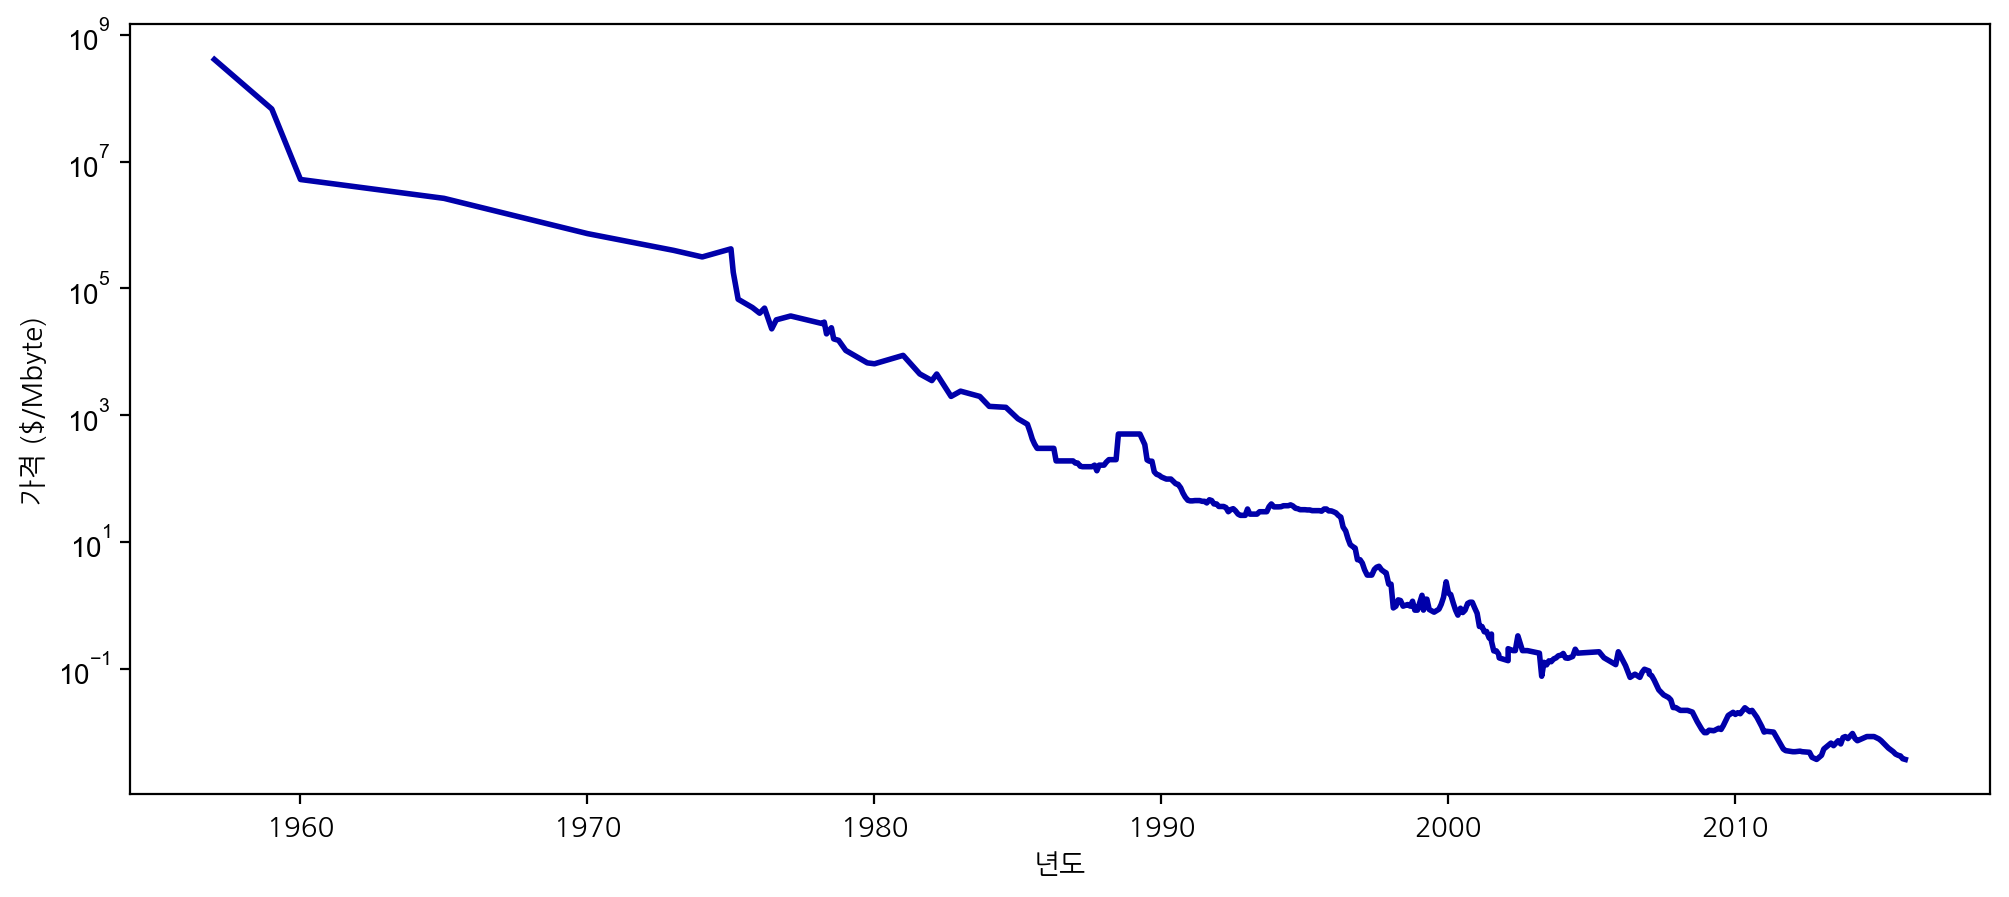

In [15]:
plt.figure(figsize=(12,5))
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")

### 데이터 준비

In [16]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

### 학습

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train, y_train)
reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)

In [18]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_reg = reg.predict(X_all)
pred_forest = forest.predict(X_all)
pred_svr = svr.predict(X_all)

In [19]:
price_tree = np.exp(pred_tree)
price_reg = np.exp(pred_reg)
price_forest = np.exp(pred_forest)
price_svr = np.exp(pred_svr)

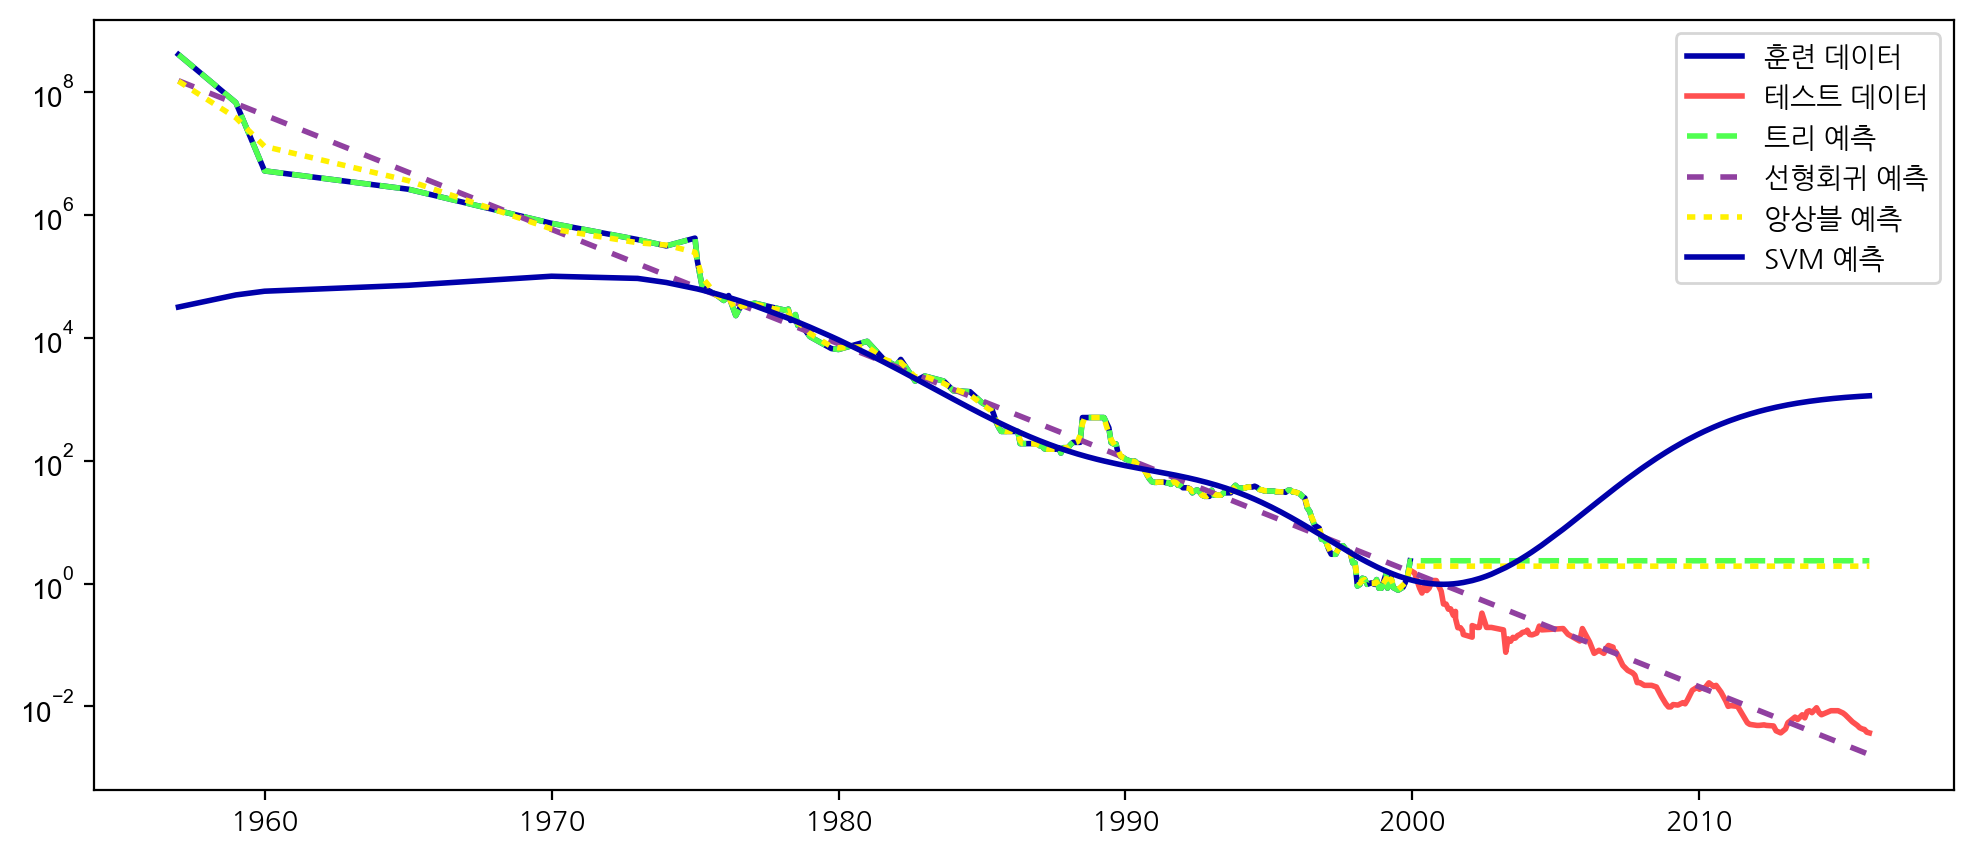

In [20]:
plt.figure(figsize=(12,5))
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_reg, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.semilogy(ram_prices.date, price_svr, label="SVM 예측")
plt.legend()

## 딥러닝(XOR 문제를 해결하자 v1)

In [36]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [37]:
print(AND(0,0),AND(0,1),AND(1,0),AND(1,1))

0 0 0 1


In [39]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [40]:
print(OR(0,0),OR(0,1),OR(1,0),OR(1,1))

0 1 1 1


In [44]:
def NAND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp > theta:
        return 0
    elif tmp <= theta:
        return 1    

In [45]:
print(NAND(0,0),NAND(0,1),NAND(1,0),NAND(1,1))

1 1 1 0


In [46]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [47]:
print(XOR(0,0),XOR(0,1),XOR(1,0),XOR(1,1))

0 1 1 0
